<a href="https://colab.research.google.com/github/jehankumar/Fake-News-Detection-ML/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fake News Detection Using Natural Language Processing and Machine Learning**

**Step 1: Import Required Libraries**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

**Step 2: Load Dataset (Fake & Real News)**

In [4]:
data_fake=pd.read_csv('/content/fake.csv')
data_true=pd.read_csv('/content/true.csv')


In [ ]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


**Step 3: Assign Labels (Target Variable)**

In [5]:
data_fake["class"]=0
data_true['class']=1

In [6]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

**Step 4: Remove Last 10 Rows for Manual Testing**

In [7]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i],axis = 0, inplace = True)


data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis = 0, inplace = True)

In [8]:
data_fake_manual_testing['class']=0
data_true_manual_testing['class']=1

/tmp/ipython-input-1676563180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class']=0
/tmp/ipython-input-1676563180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class']=1


In [9]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [10]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


**Step 5: Merge Fake & Real Data**

In [11]:
data_merge=pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [12]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

**Step 6: Drop Unnecessary Columns**

In [13]:
data=data_merge.drop(['title','subject','date'], axis = 1)#"title", "subject" and "date"
# columns is not required for detecting the fake news, so I am going to drop the columns.

In [ ]:
data.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [14]:
data.isnull().sum()

,0
text,0
class,0


**Step 7: Shuffle Dataset**

In [15]:
data = data.sample(frac = 1)# to shuffle the data

In [16]:
data.head()

,text,class
13446,Watch the only Presidential candidate who trav...,0
15994,WASHINGTON (Reuters) - The U.S. State Departme...,1
19800,LONDON (Reuters) - British Foreign Secretary B...,1
9264,"Former British Army officer, outspoken, conser...",0
15002,Somebody needs to make sure Chris Matthews doe...,0


In [17]:
data.reset_index(inplace = True)

In [18]:
data.head()

,index,text,class
0,13446,Watch the only Presidential candidate who trav...,0
1,15994,WASHINGTON (Reuters) - The U.S. State Departme...,1
2,19800,LONDON (Reuters) - British Foreign Secretary B...,1
3,9264,"Former British Army officer, outspoken, conser...",0
4,15002,Somebody needs to make sure Chris Matthews doe...,0


In [19]:

data.drop(['index'], axis = 1, inplace = True)

In [20]:
data.columns

Index(['text', 'class'], dtype='object')

**Step 8: Text Preprocessing**

In [21]:
#Preprocessing Text
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+',b'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text


<>:4: SyntaxWarning: invalid escape sequence '\['
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\['
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-1694509104.py:4: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]','',text)
/tmp/ipython-input-1694509104.py:6: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+','',text)
/tmp/ipython-input-1694509104.py:9: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*','',text)


In [22]:
data['text'] = data['text'].apply(wordopt)

**Step 9: Define Features (X) and Labels (Y)**

In [23]:
#Defining dependent(y) and independent(x) variable
x = data['text']
y = data['class']

**Step 10: Train-Test Split**

In [24]:
#Splitting the dataset into training set and testing set.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

**Step 11: Convert Text to Numerical Form (TF-IDF)**

In [25]:
#Convert text to vectors
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [26]:
xv_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6889467 stored elements and shape (33658, 95060)>

**Step 12: Train Logistic Regression Model**

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

**Step 13: Model Evaluation**

In [29]:
pred_lr = LR.predict(xv_test)

In [30]:
LR.score(xv_test, y_test)

0.985204991087344

In [31]:
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5803
           1       0.98      0.99      0.98      5417

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



**Step 14: Train Naive Bayes**

In [32]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(xv_train, y_train)

MultinomialNB()

**Step 15: Evaluate Naive Bayes**

In [33]:
pred_nb = NB.predict(xv_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, pred_nb))
print(classification_report(y_test, pred_nb))

Naive Bayes Accuracy: 0.9385026737967914
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5803
           1       0.95      0.93      0.94      5417

    accuracy                           0.94     11220
   macro avg       0.94      0.94      0.94     11220
weighted avg       0.94      0.94      0.94     11220



**step 16: Train SVM**

In [34]:
from sklearn.svm import LinearSVC

SVM = LinearSVC()
SVM.fit(xv_train, y_train)

pred_svm = SVM.predict(xv_test)

print("SVM Accuracy:", accuracy_score(y_test, pred_svm))
print(classification_report(y_test, pred_svm))

SVM Accuracy: 0.9936720142602495
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5803
           1       0.99      0.99      0.99      5417

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### **Step 17: Train Random Forest**

In [36]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(xv_train, y_train)

pred_rf = RF.predict(xv_test)

print("Random Forest Accuracy:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))


Random Forest Accuracy: 0.9883244206773618
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5803
           1       0.99      0.99      0.99      5417

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



**Step 18: Compare All Models**

In [37]:
# Model Comparison

models = {
    "Logistic Regression": LR.score(xv_test, y_test),
    "Naive Bayes": NB.score(xv_test, y_test),
    "SVM": SVM.score(xv_test, y_test),
    "Random Forest": RF.score(xv_test, y_test)
}

print("\nModel Accuracy Comparison:")
for model, acc in models.items():
    print(f"{model}: {acc:.4f}")



Model Accuracy Comparison:
Logistic Regression: 0.9852
Naive Bayes: 0.9385
SVM: 0.9937
Random Forest: 0.9883


**Step 19:Accuracy Graph**

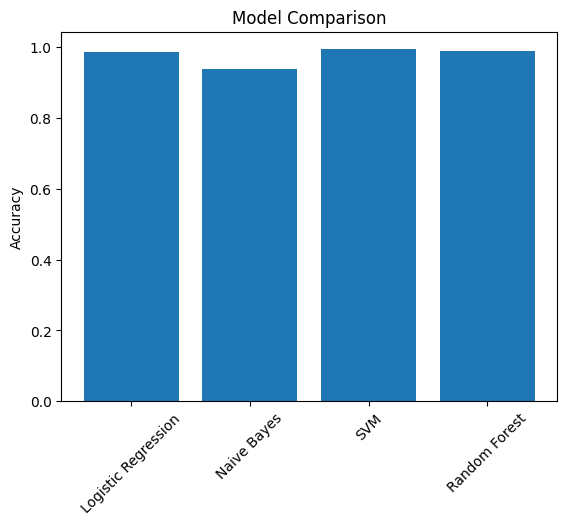

In [38]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(models.keys(), models.values())
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()


**Step 20: Output Label Function**

In [48]:
def output_label(n):
    return "Fake News" if n == 0 else "Real News"


**Step 21: Manual News Testing**

In [49]:
def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)

    pred_LR = LR.predict(new_xv_test)

    print("\nLR Prediction:", output_label(pred_LR[0]))


**Step 22: Run Model in Colab**

In [50]:
news = input("Enter news text to check: ")
manual_testing(news)


Enter news text to check: Abigail Disney is an heiress with brass ovaries who will profit from the GOP tax scam bill but isn t into f-cking poor people over. Ms. Disney penned an op-ed for USA Today in which she rips the GOP a new one because she has  always been cognizant of income and wealth inequality.  In other words, she is not Donald Trump, Paul Ryan or Bob Corker. Or Mitch McConnell. She is Abigail Disney, dammit. Since the election of Ronald Reagan, the gap between rich and poor has grown dramatically and  trickle down  economics has turned out to cause more of a trickle up,  she writes.  But nothing has brought the problem of inequality into sharper focus for me than the current proposals by Republicans to overhaul the tax system. Disney says that this proposal will be burdensome to the middle class while decreasing  the responsibility of the wealthy to contribute to the common good. And then she dropped a truth bomb. (We like truth bombs.)Republicans insist this plan will cut

In [51]:
news = input("Enter news text to check: ")
manual_testing(news)


Enter news text to check: The following statementsÂ were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own.Â Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - â€œOn 1/20 - the day Trump was inaugurated - an estimated 35,000 ISIS fighters held approx 17,500 square miles of territory in both Iraq and Syria. As of 12/21, the U.S. military estimates the remaining 1,000 or so fighters occupy roughly 1,900 square miles...â€ via @jamiejmcintyre  [1749 EST] - Just left West Palm Beach Fire & Rescue #2. Met with great men and women as representatives of those who do so much for all of us. Firefighters, paramedics, first responders - what amazing people they are! [1811 EST] - â€œOn 1/20 - the day Trump was inaugurated - an estimated 35,000 ISIS fighters held approx 17,500 square miles of territory in both Iraq and Syria. As of 12/21, the U.S. military est the remaining 1